In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data1.csv") # read comma separated data
print(data.head()) # print some values

        X        Y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


In [3]:
X = data.iloc[:, 0]
Y = data.iloc[:, 1]

In [4]:
# print("X =", np.array(X))
# print("Y =", np.array(Y))

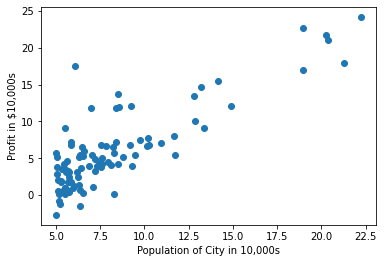

In [5]:
plt.scatter(X, Y)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [6]:
theta = np.zeros((2, 1))
iterations = 1500
alpha = 0.01
J_history = []

In [7]:
def compute_cost(X, Y, theta):
    m = Y.shape[0] # number of training examples
    J = (1/(2*m)) * np.sum((theta[0] + theta[1] * X - Y) ** 2) # cost function
    return J

In [8]:
def gradient_descent(X, Y, theta, alpha, num_iters):
    m = Y.shape[0] # number of training examples
    
    for i in range(num_iters):

        t0 = np.sum(theta[0] + theta[1] * X - Y) # Y_pred - Y_actual
        t1 = np.sum((theta[0] + theta[1] * X - Y) * X)

        theta[0] = theta[0] - (alpha/m) * t0
        theta[1] = theta[1] - (alpha/m) * t1

        J_history.append(compute_cost(X, Y, theta))

    return theta

In [9]:
theta_new = gradient_descent(X, Y, theta, alpha, iterations)

In [10]:
theta_new

array([[-3.63029144],
       [ 1.16636235]])

In [11]:
def myfunc(X):
    return theta_new[0] + theta_new[1]*X
mymodel = list(map(myfunc, X))

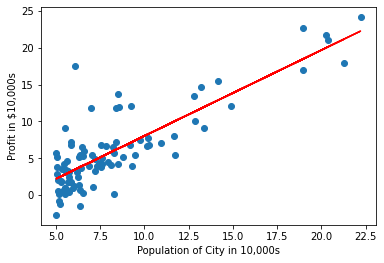

In [12]:
plt.scatter(X, Y)
plt.plot(X, mymodel, color="red")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

In [13]:
# Predict for new values
print(f"For population = 35,000, we predict a profit of {int(myfunc(3.5)*10000)}")
print(f"For population = 70,000, we predict a profit of {int(myfunc(7)*10000)}")

For population = 35,000, we predict a profit of 4519
For population = 70,000, we predict a profit of 45342


Text(0, 0.5, 'Error')

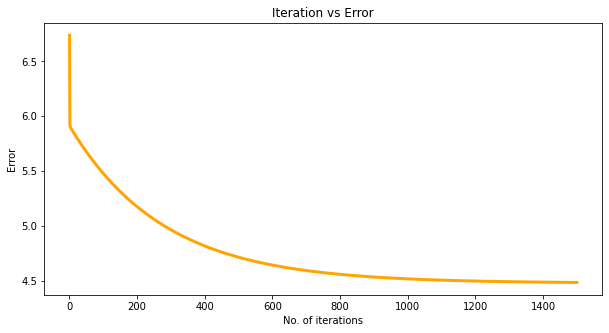

In [14]:
# Draw a cost function
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(J_history)+1), J_history, color="orange", linewidth=3)
plt.title("Iteration vs Error")
plt.xlabel("No. of iterations")
plt.ylabel("Error")

In [15]:
np.random.seed(1)

theta0_vals = np.random.uniform(low=-10, high=10, size=(100,)) # np.arange(from, to, quantity)
theta1_vals = np.random.uniform(low=-1, high=4, size=(100,))

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [theta0_vals[i], theta1_vals[j]]
        J_vals[i, j] = compute_cost(X, Y, t)